In [1]:
import os
#import numpy for number array handling and represent rgb image pixel values
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import libraries for visualization of data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

### Download data ###

In [2]:
#paths to the train, validation and test image datasets 
train_path = '../input/garbage-classification/garbage classification/Garbage classification'
valid_path = '../input/garbage-classification/garbage classification/Garbage classification'

### Set up for Generic CNN model

In [3]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

for label in labels:
    directory = os.path.join(train_path, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


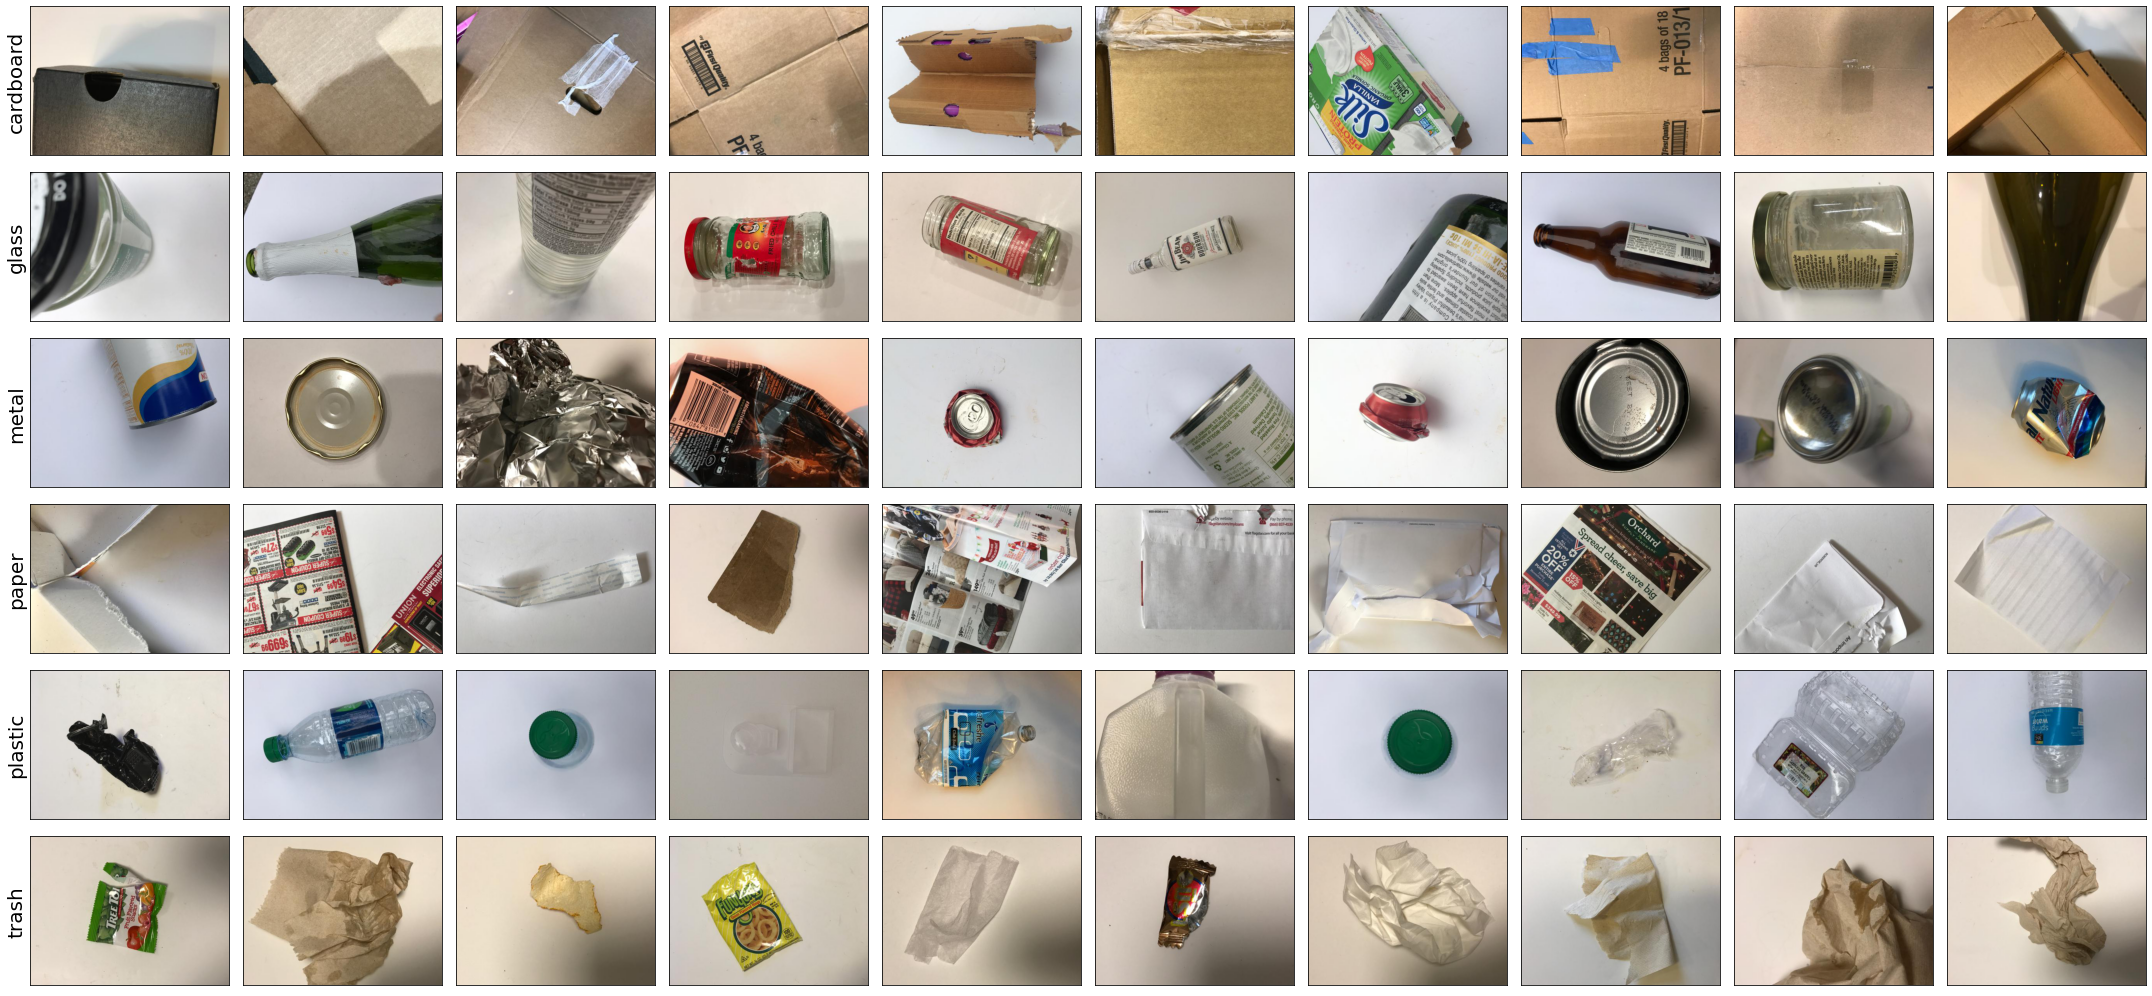

In [4]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_path, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [5]:
# checking size of individual image

directory = os.path.join(train_path, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [6]:
# creating the model

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

2021-12-07 05:58:18.800560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 05:58:18.909784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 05:58:18.910500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 05:58:18.911614: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      1

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_path, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [9]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator)

2021-12-07 05:58:23.941638: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-12-07 05:58:27.242972: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


64/64 [==============================] - 134s 2s/step - loss: 1.6611 - accuracy: 0.4708 - val_loss: 9.9611 - val_accuracy: 0.1988
Epoch 2/50
64/64 [==============================] - 116s 2s/step - loss: 1.3014 - accuracy: 0.5455 - val_loss: 20.5349 - val_accuracy: 0.1988
Epoch 3/50
64/64 [==============================] - 115s 2s/step - loss: 1.1669 - accuracy: 0.5968 - val_loss: 24.7705 - val_accuracy: 0.1988
Epoch 4/50
64/64 [==============================] - 114s 2s/step - loss: 1.1203 - accuracy: 0.6146 - val_loss: 33.1395 - val_accuracy: 0.1909
Epoch 5/50
64/64 [==============================] - 114s 2s/step - loss: 1.0398 - accuracy: 0.6304 - val_loss: 3.3673 - val_accuracy: 0.2266
Epoch 6/50
64/64 [==============================] - 114s 2s/step - loss: 0.9853 - accuracy: 0.6527 - val_loss: 5.7132 - val_accuracy: 0.2286
Epoch 7/50
64/64 [==============================] - 114s 2s/step - loss: 0.9614 - accuracy: 0.6675 - val_loss: 12.1172 - val_accuracy: 0.2266
Epoch 8/50
64/64 [==

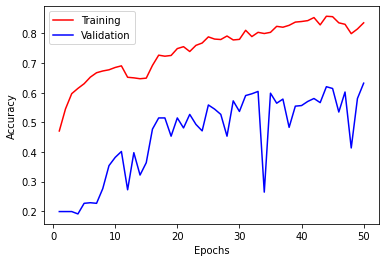

In [10]:
num_epochs = range(1,51)
plt.plot(num_epochs, history.history['accuracy'], label='Training', c='r')
plt.plot(num_epochs, history.history['val_accuracy'], label='Validation', c='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

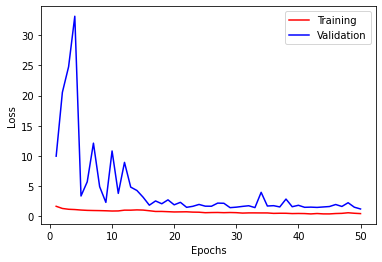

In [11]:
plt.plot(num_epochs,history.history['loss'],c="red",label="Training")
plt.plot(num_epochs,history.history['val_loss'],c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Implementing the VGG 16 Model on the Images data set

**Augmenting and Generate training data set**

In [12]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], 
                                                        batch_size=16, subset='training')

Found 2024 images belonging to 6 classes.


**Generating validatoin data set**

In [13]:
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 503 images belonging to 6 classes.


**View the preprocessed picture**

In [14]:
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

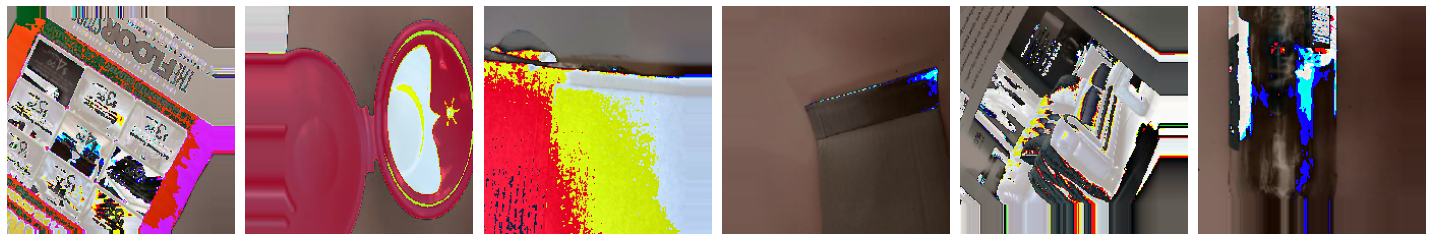

In [15]:
imgs, labels = next(train_batches)
plotImages(imgs)

**Build a convolutional neural network**

In [16]:
#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Add layers to the model and build the model**

In [18]:

model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)              

**Set the loss functions、metrics、adam（The initial learning rate 0.0001）**

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
127/127 - 33s - loss: 1.7279 - accuracy: 0.3997 - val_loss: 1.0618 - val_accuracy: 0.6163
Epoch 2/20
127/127 - 29s - loss: 0.9700 - accuracy: 0.6369 - val_loss: 0.8661 - val_accuracy: 0.7058
Epoch 3/20
127/127 - 29s - loss: 0.7923 - accuracy: 0.7060 - val_loss: 0.7983 - val_accuracy: 0.7256
Epoch 4/20
127/127 - 29s - loss: 0.7094 - accuracy: 0.7540 - val_loss: 0.7441 - val_accuracy: 0.7316
Epoch 5/20
127/127 - 29s - loss: 0.6272 - accuracy: 0.7712 - val_loss: 0.7030 - val_accuracy: 0.7416
Epoch 6/20
127/127 - 29s - loss: 0.5781 - accuracy: 0.7930 - val_loss: 0.6742 - val_accuracy: 0.7495
Epoch 7/20
127/127 - 29s - loss: 0.5257 - accuracy: 0.8083 - val_loss: 0.6628 - val_accuracy: 0.7555
Epoch 8/20
127/127 - 29s - loss: 0.4866 - accuracy: 0.8340 - val_loss: 0.6398 - val_accuracy: 0.7515
Epoch 9/20
127/127 - 29s - loss: 0.4710 - accuracy: 0.8291 - val_loss: 0.6524 - val_accuracy: 0.7555
Epoch 10/20
127/127 - 29s - loss: 0.4212 - accuracy: 0.8483 - val_loss: 0.6467 - val_accura

In [21]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [22]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [23]:
len(validation_accuracy)

20

**Fine-tune model**

In [24]:
base_model.trainable=True

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)              

In [26]:
model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)

Epoch 1/8
127/127 - 29s - loss: 0.2661 - accuracy: 0.9042 - val_loss: 0.6261 - val_accuracy: 0.7753
Epoch 2/8
127/127 - 29s - loss: 0.2554 - accuracy: 0.9135 - val_loss: 0.6142 - val_accuracy: 0.7714
Epoch 3/8
127/127 - 30s - loss: 0.2156 - accuracy: 0.9279 - val_loss: 0.6019 - val_accuracy: 0.7813
Epoch 4/8
127/127 - 28s - loss: 0.2362 - accuracy: 0.9205 - val_loss: 0.6268 - val_accuracy: 0.7753
Epoch 5/8
127/127 - 33s - loss: 0.2219 - accuracy: 0.9254 - val_loss: 0.6146 - val_accuracy: 0.7793
Epoch 6/8
127/127 - 29s - loss: 0.2086 - accuracy: 0.9284 - val_loss: 0.6011 - val_accuracy: 0.7833
Epoch 7/8
127/127 - 29s - loss: 0.1890 - accuracy: 0.9392 - val_loss: 0.6249 - val_accuracy: 0.7773
Epoch 8/8
127/127 - 29s - loss: 0.2040 - accuracy: 0.9313 - val_loss: 0.6232 - val_accuracy: 0.7753


In [27]:
model.save('vgg16.h5')

**View training results**

In [28]:
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

In [29]:
len(validation_accuracy)

28

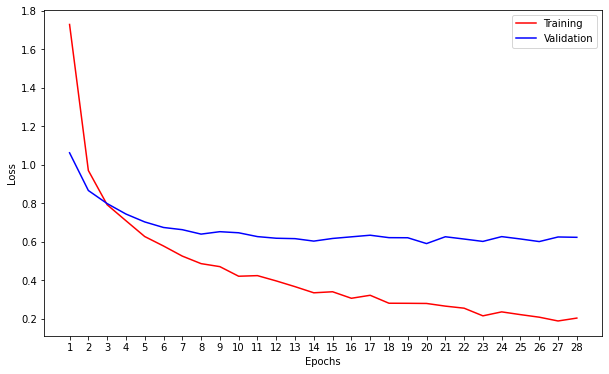

In [30]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

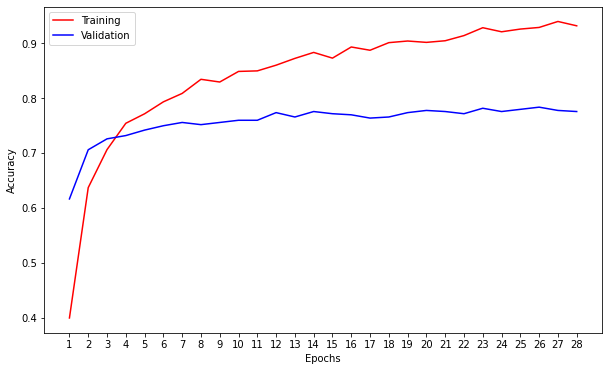

In [31]:
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

### Implementing the RESNET50 Model on the Images Data set

In [32]:
##RESNET50

In [33]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')

Found 2024 images belonging to 6 classes.


In [34]:
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 503 images belonging to 6 classes.


In [35]:
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

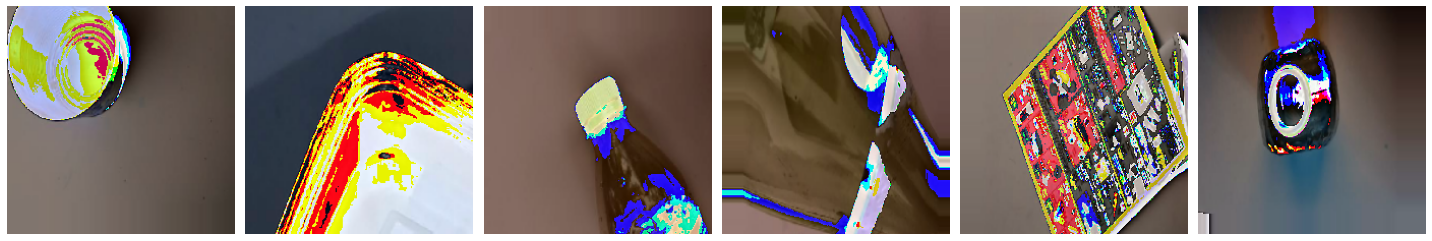

In [36]:
imgs, labels = next(train_batches)
plotImages(imgs)

In [37]:
#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [38]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [39]:
model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)              

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
127/127 - 33s - loss: 1.2037 - accuracy: 0.5662 - val_loss: 0.7232 - val_accuracy: 0.7296
Epoch 2/20
127/127 - 28s - loss: 0.6421 - accuracy: 0.7792 - val_loss: 0.5639 - val_accuracy: 0.7893
Epoch 3/20
127/127 - 29s - loss: 0.5216 - accuracy: 0.8202 - val_loss: 0.5224 - val_accuracy: 0.8091
Epoch 4/20
127/127 - 29s - loss: 0.4345 - accuracy: 0.8493 - val_loss: 0.5179 - val_accuracy: 0.8151
Epoch 5/20
127/127 - 30s - loss: 0.3614 - accuracy: 0.8829 - val_loss: 0.4975 - val_accuracy: 0.8310
Epoch 6/20
127/127 - 29s - loss: 0.3554 - accuracy: 0.8760 - val_loss: 0.5153 - val_accuracy: 0.8091
Epoch 7/20
127/127 - 29s - loss: 0.2966 - accuracy: 0.8977 - val_loss: 0.5416 - val_accuracy: 0.8211
Epoch 8/20
127/127 - 29s - loss: 0.2682 - accuracy: 0.9007 - val_loss: 0.5204 - val_accuracy: 0.8330
Epoch 9/20
127/127 - 29s - loss: 0.2587 - accuracy: 0.9071 - val_loss: 0.5184 - val_accuracy: 0.8171
Epoch 10/20
127/127 - 30s - loss: 0.2350 - accuracy: 0.9170 - val_loss: 0.5114 - val_accura

In [42]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [43]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [44]:
base_model.trainable=True

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)              

In [46]:
model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)

Epoch 1/8
127/127 - 29s - loss: 0.1124 - accuracy: 0.9659 - val_loss: 0.6181 - val_accuracy: 0.8270
Epoch 2/8
127/127 - 29s - loss: 0.1108 - accuracy: 0.9659 - val_loss: 0.5425 - val_accuracy: 0.8350
Epoch 3/8
127/127 - 30s - loss: 0.0952 - accuracy: 0.9738 - val_loss: 0.5422 - val_accuracy: 0.8370
Epoch 4/8
127/127 - 29s - loss: 0.1013 - accuracy: 0.9713 - val_loss: 0.5480 - val_accuracy: 0.8429
Epoch 5/8
127/127 - 30s - loss: 0.1040 - accuracy: 0.9639 - val_loss: 0.5799 - val_accuracy: 0.8250
Epoch 6/8
127/127 - 29s - loss: 0.0740 - accuracy: 0.9792 - val_loss: 0.5724 - val_accuracy: 0.8410
Epoch 7/8
127/127 - 31s - loss: 0.0897 - accuracy: 0.9713 - val_loss: 0.5423 - val_accuracy: 0.8350
Epoch 8/8
127/127 - 30s - loss: 0.0780 - accuracy: 0.9812 - val_loss: 0.5663 - val_accuracy: 0.8270


In [47]:
model.save('ResNet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [48]:
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

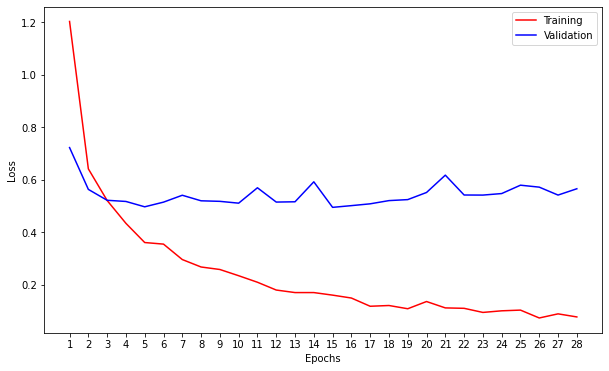

In [49]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

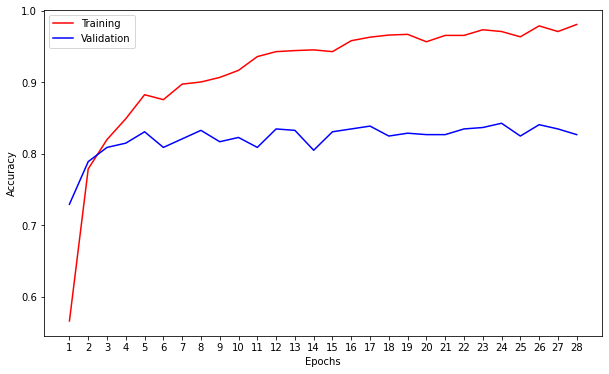

In [50]:
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

### Implementing the VGG 19 Model on the Images Dataset

In [ ]:
###VGG19

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


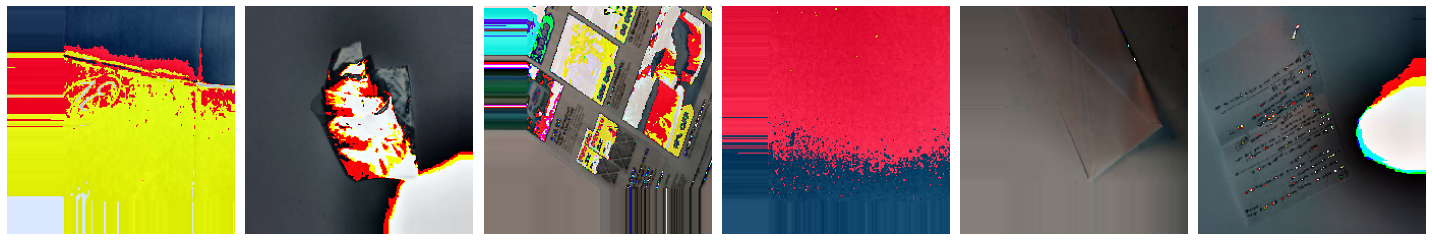

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

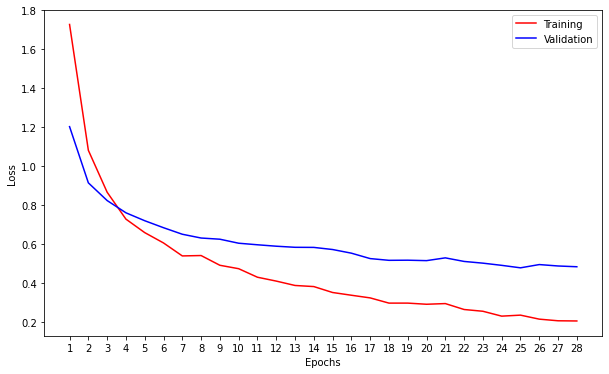

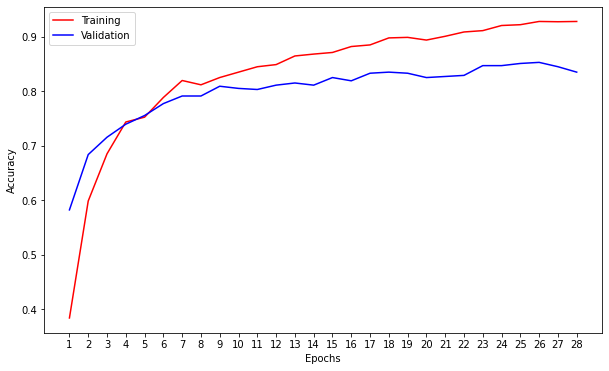

In [51]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')




valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


imgs, labels = next(train_batches)
plotImages(imgs)


#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')


base_model.summary()


model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss'] 


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

base_model.trainable=True

model.summary()

model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)


model.save('vgg19.h5')


loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])


epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()


epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

### Implementing the Mobilenet model on the images dataset

In [ ]:
###MobileNet

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


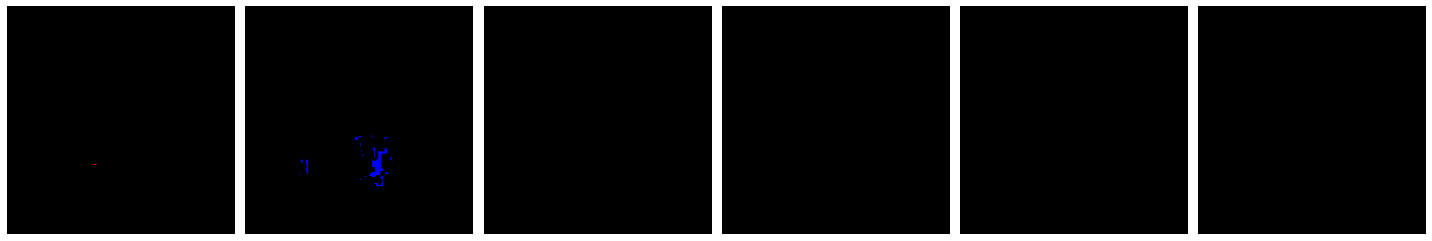

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

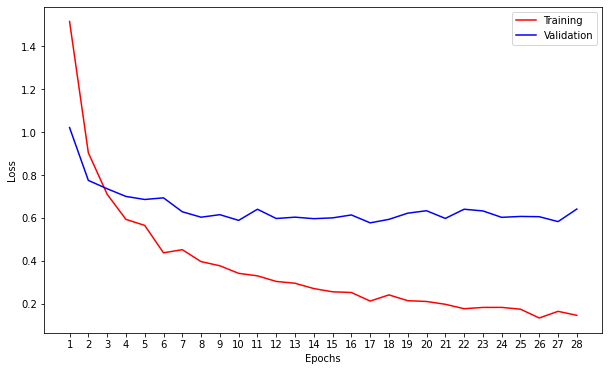

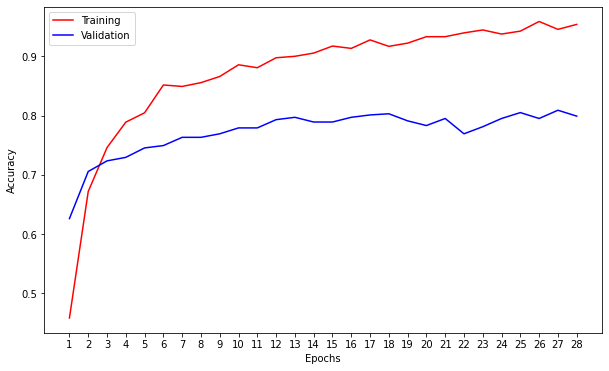

In [52]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')




valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


imgs, labels = next(train_batches)
plotImages(imgs)


#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')


base_model.summary()


model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss'] 


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

base_model.trainable=True

model.summary()

model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)


model.save('vgg19.h5')


loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])


epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()


epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

### Implementing the Densenet model on the Images Dataset

In [1]:
###densenet

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


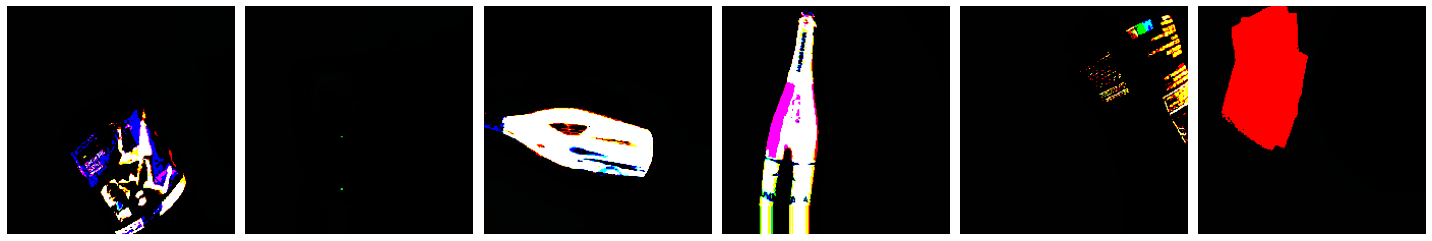

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

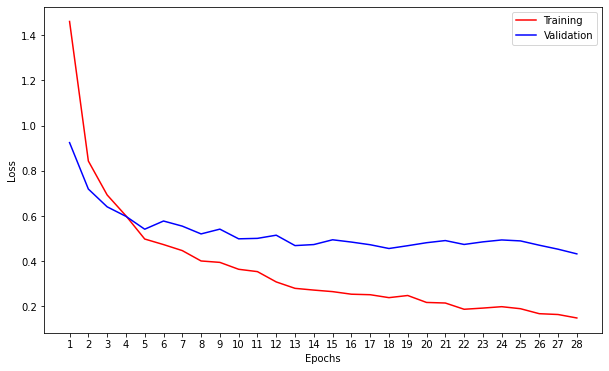

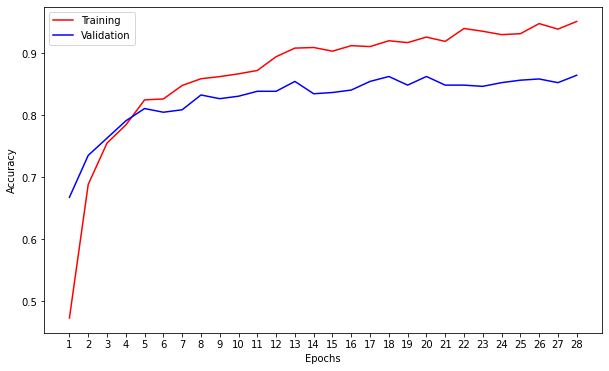

In [53]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')




valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


imgs, labels = next(train_batches)
plotImages(imgs)


#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')


base_model.summary()


model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss'] 


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

base_model.trainable=True

model.summary()

model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)


model.save('DenseNet121.h5')


loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])


epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()


epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

### Implementing the Xception model on the Images Dataset

In [ ]:
###xception

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


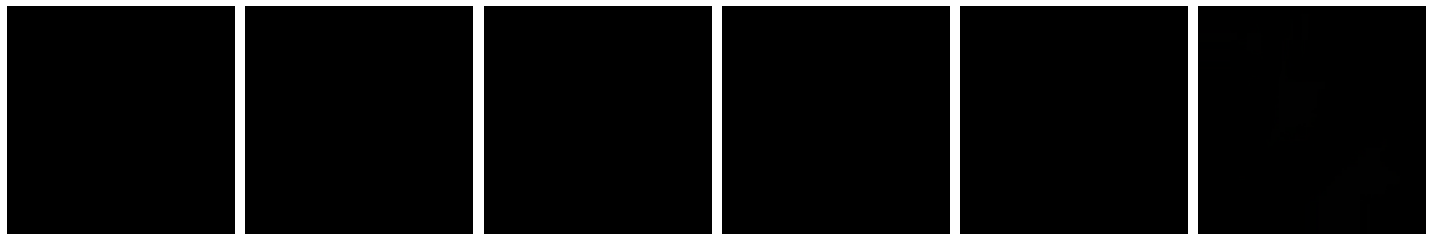

83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [54]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')




valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


imgs, labels = next(train_batches)
plotImages(imgs)


#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')


base_model.summary()


model = Sequential()

base_model.trainable=True

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss'] 


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

### Implementing the Mobilenet on the Images Dataset

In [55]:
### Mobilenet

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


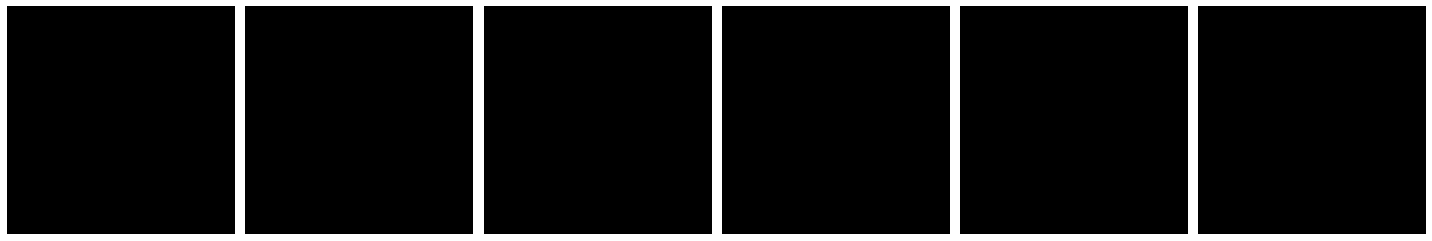

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

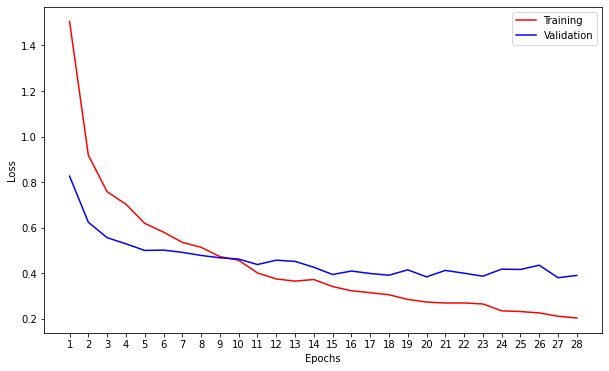

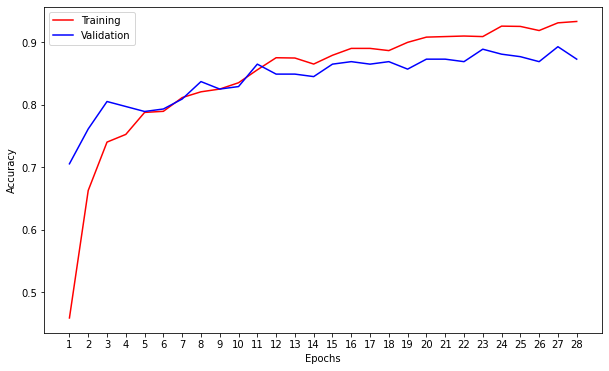

In [56]:
train_batches = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.1,
    horizontal_flip=True,
    vertical_flip=True).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')




valid_batches = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


imgs, labels = next(train_batches)
plotImages(imgs)


#imput image size
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#Import the pretrained weights VGG basic model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')


base_model.summary()


model = Sequential()

base_model.trainable=False

#Load the pretrained model
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         

model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        

model.add(Dense(units=6, activation='softmax')) 
model.summary()


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss'] 


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

base_model.trainable=True

model.summary()

model_details = model.fit(x=train_batches,validation_data=valid_batches,
                          epochs=8, verbose=2)


model.save('DenseNet121.h5')


loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])


epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()


epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()